In [9]:
import os
import traceback
import numpy
from pydub import AudioSegment
from matplotlib import pyplot as plt
import librosa.display
import librosa
import cv2
from skimage.color import rgb2gray
formats_to_convert = ['.m4a']
FIG_SIZE = (2.56, 1.40)

C:\Users\jaehee\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [51]:
def wav2sepc():
    for i in range(1,6):
        plt.figure(figsize=FIG_SIZE)
        audio, sampling_rate = librosa.load("C:/Users/jaehee/.keras/datasets/new_wav_data/living_room/living_room"+ str(i) +".wav")
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sampling_rate, n_mels=256, hop_length=128, fmax=8000)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=numpy.max)
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(mel_spectrogram)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_spec_data/living_room/living_room'+str(i)+'.png', bbox_inches='tight',pad_inches=0)

In [52]:
def wav2sepc2():
    for i in range(1,9):
        plt.figure(figsize=FIG_SIZE)
        audio, sampling_rate = librosa.load("C:/Users/jaehee/.keras/datasets/new_wav_data/tv_on/tv"+ str(i) +".wav")
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sampling_rate, n_mels=256, hop_length=128, fmax=8000)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=numpy.max)
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(mel_spectrogram)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_spec_data/tv_on/tv'+str(i)+'.png', bbox_inches='tight',pad_inches=0)

In [53]:
def wav2sepc3():
    for i in range(1,7):
        plt.figure(figsize=FIG_SIZE)
        audio, sampling_rate = librosa.load("C:/Users/jaehee/.keras/datasets/new_wav_data/weather/weather"+ str(i) +".wav")
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sampling_rate, n_mels=256, hop_length=128, fmax=8000)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=numpy.max)
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(mel_spectrogram)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_spec_data/weather/weather'+str(i)+'.png', bbox_inches='tight',pad_inches=0)

In [58]:
def pre_denoise():
    for i in range(1,6):
        plt.figure(figsize=FIG_SIZE)
        img = cv2.imread('C:/Users/jaehee/.keras/datasets/new_spec_data/living_room/living_room' + str(i)+ '.png')
        dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
        gray = rgb2gray(dst)
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_gray_data/living_room/living_room'+str(i)+'.png', bbox_inches='tight',
                pad_inches=0)

In [59]:
def pre_denoise2():
    for i in range(1,9):
        plt.figure(figsize=FIG_SIZE)
        img = cv2.imread('C:/Users/jaehee/.keras/datasets/new_spec_data/tv_on/tv' + str(i)+ '.png')
        dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
        gray = rgb2gray(dst)
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_gray_data/tv_on/tv'+str(i)+'.png', bbox_inches='tight',
                pad_inches=0)

In [60]:
def pre_denoise3():
    for i in range(1,7):
        plt.figure(figsize=FIG_SIZE)
        img = cv2.imread('C:/Users/jaehee/.keras/datasets/new_spec_data/weather/weather' + str(i)+ '.png')
        dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
        gray = rgb2gray(dst)
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_gray_data/weather/weather'+str(i)+'.png', bbox_inches='tight',
                pad_inches=0)

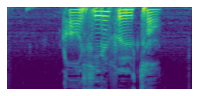

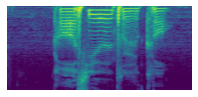

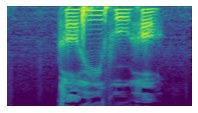

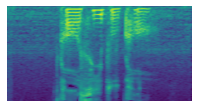

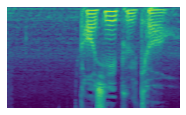

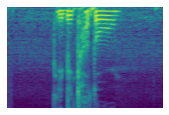

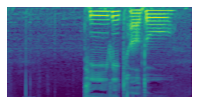

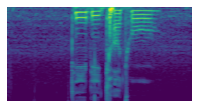

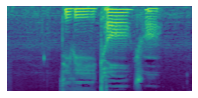

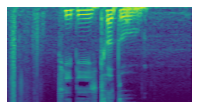

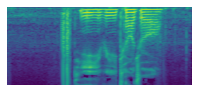

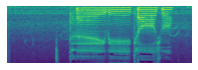

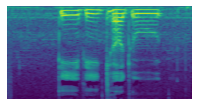

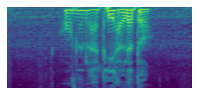

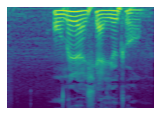

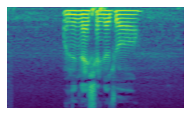

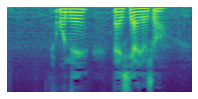

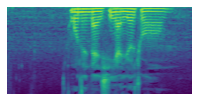

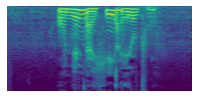

In [57]:
wav2sepc()
wav2sepc2()
wav2sepc3()

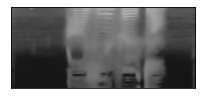

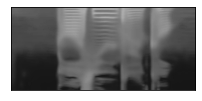

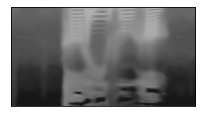

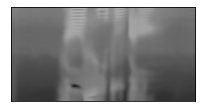

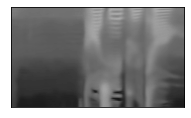

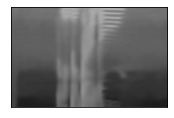

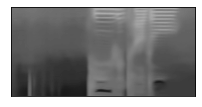

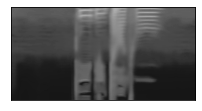

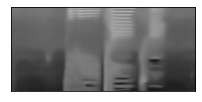

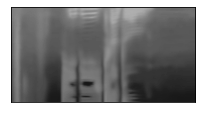

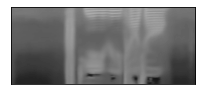

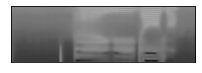

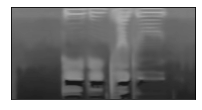

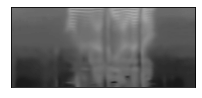

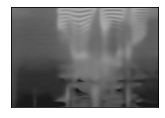

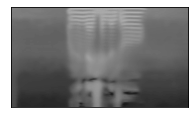

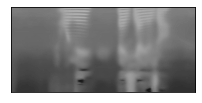

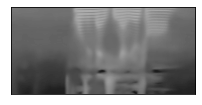

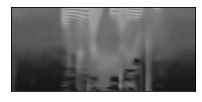

In [61]:
pre_denoise()
pre_denoise2()
pre_denoise3()